# La **régression** avec Scikit Learn
    - Lecture de jeux de données avec scikit learn pour la régression
    - Création de différents modèles de régression
    - Paramétrage des modèles

![Regression_Models](https://miro.medium.com/max/700/1*q5aSs5f5w-TcbhT3RdLXTg.png)

In [404]:
# theta = [th_0, th_1, th_2, th_3]
# feat = [f_1, f_2, f_3]


# y = th_0 + (th_1 * f_1) + (th_2 * f_2) + (th_3 *f_3)

# for i in x:
#      res = compute_gradient(Y, Y_pred)
#     theta = res * learning_rate

# Load and Clean the Data

## import

In [405]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

## Setup

In [406]:
# Import packages and load the full dataset
%matplotlib inline

# Setup
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)
pd.set_option('display.max_columns', None)

# Ignore the warnings
warnings.filterwarnings('ignore')

In [407]:
# !type ./houses/data_description.txt

## Load and vars

In [408]:
# Load the data
path_train = "houses/train.csv"
path_test = "houses/test.csv"
df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

# Var names
target_feature = "SalePrice"

# Data Explo

In [409]:
# DUmmies
# Col : Heating

In [410]:
# ! cat houses/data_description.txt | grep -A 10 Heating

## Data shape

In [411]:
# Head
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [412]:
# shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
# (rows,columns)
df_train.shape

(1460, 81)

In [413]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [414]:
df_test.shape
# 1 column less because target variable isn't there in test set!
# Difference in Examples is pure random

(1459, 80)

## Variable Identification

In [415]:
# info method provides information about dataset like
# total values in each column, null/not null, datatype, memory occupied etc
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [416]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [417]:
# How many columns with different datatypes are there?
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [418]:
# Describe gives statistical information about numerical columns in the dataset
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

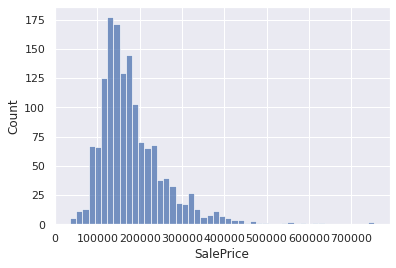

In [419]:
sns.histplot(df_train['SalePrice'])

## Correlation in Data

In [420]:
corr = df_train.corr()[target_feature]
corr[np.argsort(corr, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We do not care if correlation is positive or negative !

In [421]:
corr[np.argsort(abs(corr), axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass      -0.084284
OverallCond     -0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePr

Above 50% correlation with SalesPrice:

   - OverallQual
   - GrLivArea
   - GarageCars
   - GarageArea
   - TotalBsmtSF
   - 1stFlrSF
   - FullBath
   - TotRmsAbvGrd
   - YearBuilt
   - YearRemodAdd

In [422]:
f_interest = [
    "SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "GarageYrBlt", "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd",
    "YearBuilt", "YearRemodAdd"
]

Text(0.5, 1.0, 'Correlation Coefficients w.r.t Sale Price')

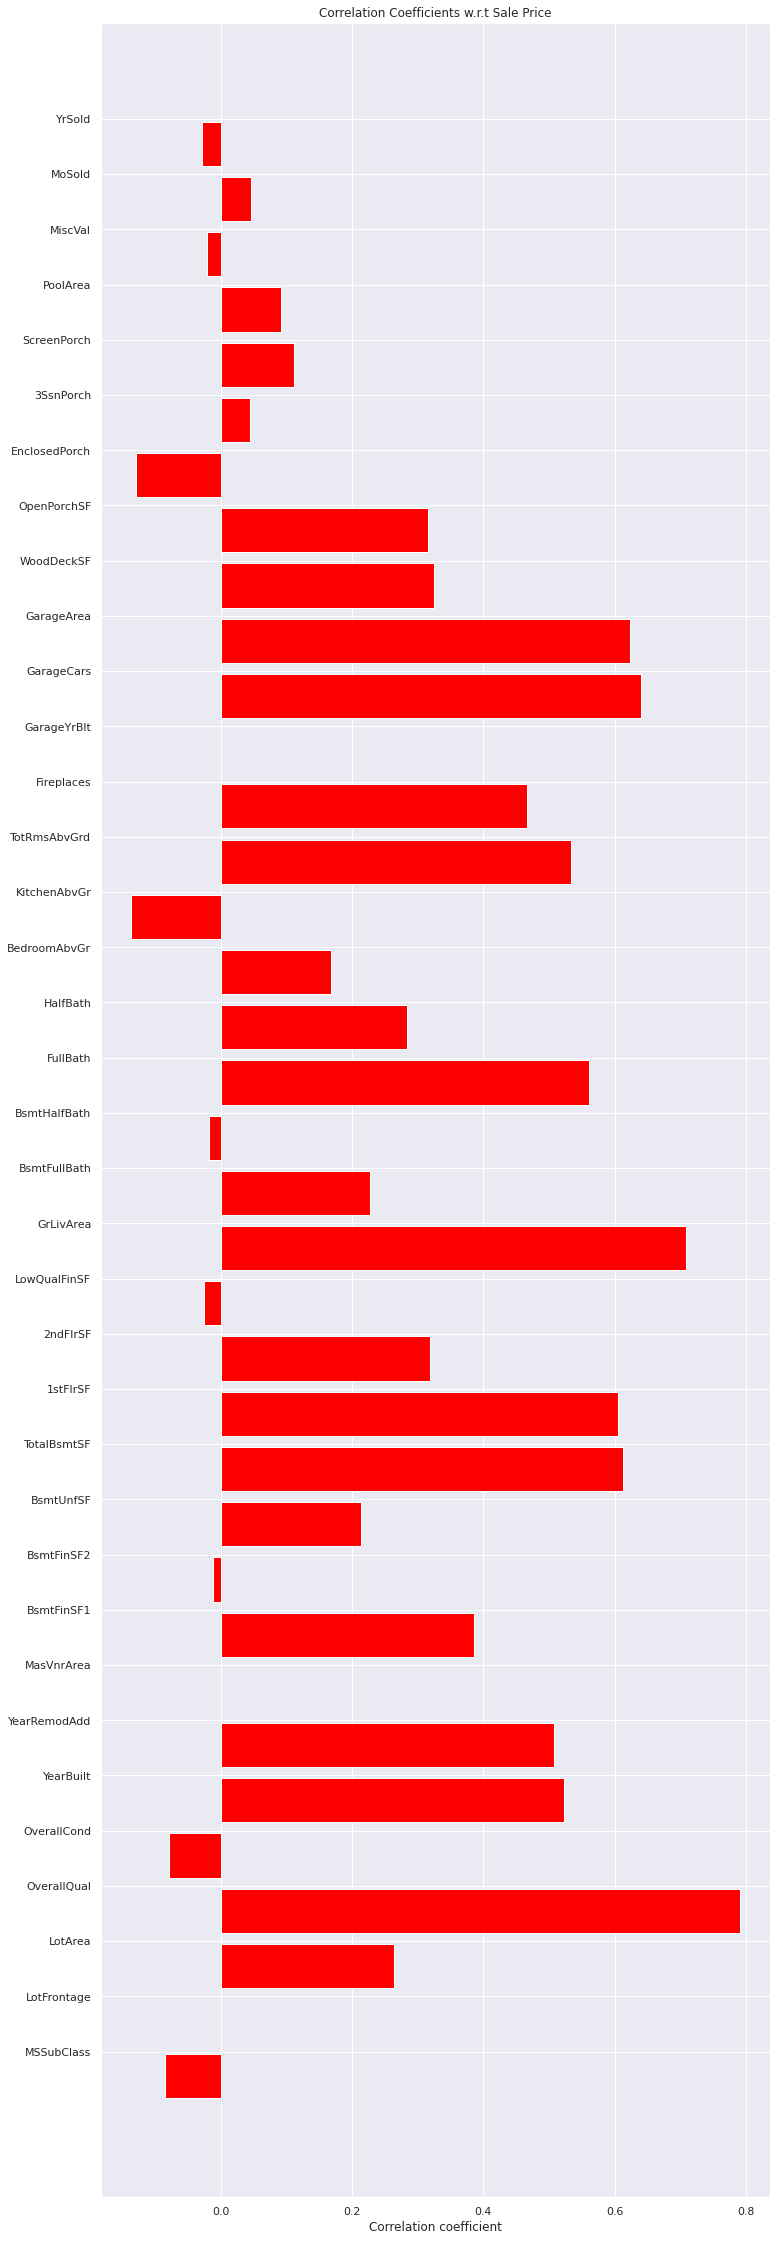

In [423]:
# plotting correlations
num_feat = df_train.columns[df_train.dtypes != object]
num_feat = num_feat[1:-1]
labels = []
values = []
for col in num_feat:
    labels.append(col)
    values.append(
        np.corrcoef(df_train[col].values, df_train.SalePrice.values)[0, 1])

ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 40))
rects = ax.barh(ind, np.array(values), color='red')
ax.set_yticks(ind + ((width) / 2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients w.r.t Sale Price")

In [424]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

### SalePrice vs OverallQual

In [425]:
!cat houses/data_description.txt | grep - A 12 OverallQual

grep: A: No such file or directory
grep: 12: No such file or directory
grep: OverallQual: No such file or directory


<Figure size 1296x1296 with 0 Axes>

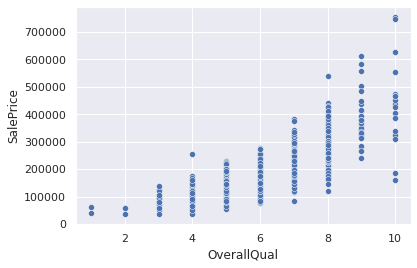

<Figure size 1296x1296 with 0 Axes>

In [426]:
sns.scatterplot(data=df_train, y='SalePrice', x='OverallQual')
plt.figure(figsize=(18, 18))

OverallQual is a categorical variable, and a scatter plot is not the best way to visualize categorical variables.

However, there is an apparent relationship between the two features.

The price of the houses increases with the overall quality.

Let's check out some more features to determine the outliers.

Let's focus on the numerical variables this time.

### SalePrice vs GrLivArea

In [427]:
!cat houses/data_description.txt | grep - A 1 GrLivArea

grep: A: No such file or directory
grep: 1: No such file or directory
grep: GrLivArea: No such file or directory


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

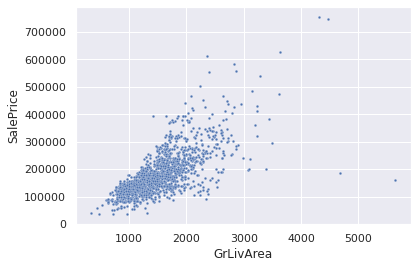

In [428]:
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

### SalePrice vs GarageArea

In [429]:
!cat houses/data_description.txt | grep - A 1 GarageArea

grep: A: No such file or directory
grep: 1: No such file or directory
grep: GarageArea: No such file or directory


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

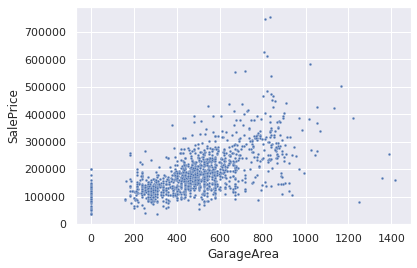

In [430]:
sns.scatterplot(data=df_train, y='SalePrice', x='GarageArea', s=7)

### SalePrice vs TotalBsmtSF

In [431]:
!cat houses/data_description.txt | grep - A 1 TotalBsmtSF

grep: A: No such file or directory
grep: 1: No such file or directory
grep: TotalBsmtSF: No such file or directory


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

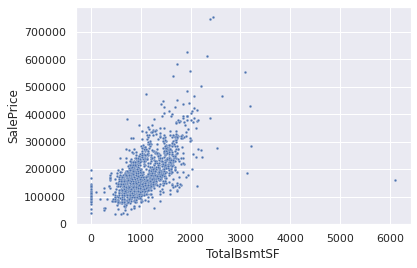

In [432]:
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

### SalePrice vs 1stFlrSF

In [433]:
!cat houses/data_description.txt | grep - A 1 1stFlrSF

grep: A: No such file or directory
grep: 1: No such file or directory
grep: 1stFlrSF: No such file or directory


<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

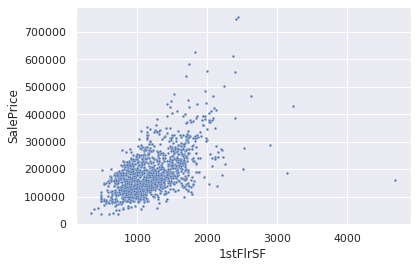

In [434]:
sns.scatterplot(data=df_train, y='SalePrice', x='1stFlrSF', s=7)

### SalePrice vs MasVnrArea

In [435]:
!cat houses/data_description.txt | grep - A 1 MasVnrArea

grep: A: No such file or directory
grep: 1: No such file or directory
grep: MasVnrArea: No such file or directory


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

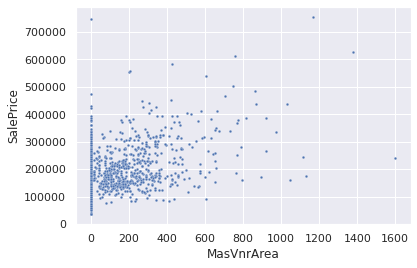

In [436]:
sns.scatterplot(data=df_train, y='SalePrice', x='MasVnrArea', s=7)

### Observations

Target variable is subject to Heteroscedasticity:
    
    shows an unequal level of variance across most predictor(independent) variables. 
 
This is a red flag for multiple linear regression model.

 - Heteroscedasticity
 - Many outliers
 - Outliers:
     - SalePrice vs. GrLivArea:
        - The two on the top-right edge of seem to follow a trend: As the prices increased, so did the area.
        - The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.
     - SalePrice vs TotalBsmtSF
         - The one on the bottom right



### Outliers

#### SalePrice vs. GrLivArea

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

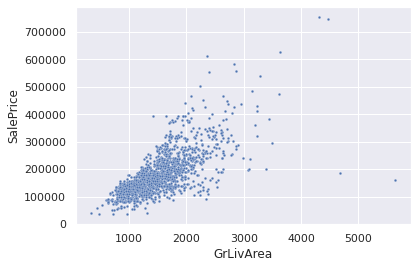

In [437]:
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

As you can see, there are two outliers in the plot.

We will get rid off them

In [438]:
df_outliners = df_train.loc[df_train.GrLivArea >= 4500]
df_outliners[['SalePrice', 'GrLivArea']]

,SalePrice,GrLivArea
523,184750,4676
1298,160000,5642


In [439]:
outliner_replace = df_train.loc[(df_train.SalePrice >= 160_000) & (
    df_train.SalePrice <= 185_000)].mean().GrLivArea
outliner_replace

1526.1565217391305

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

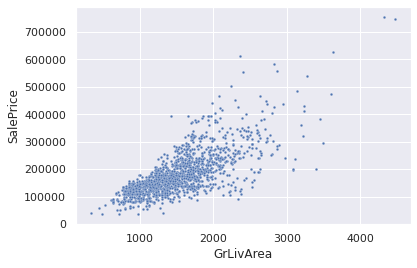

In [440]:
df_train.GrLivArea.loc[df_train.GrLivArea >= 4500] = outliner_replace
sns.scatterplot(data=df_train, y='SalePrice', x='GrLivArea', s=7)

#### SalePrice vs TotalBsmtSF

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

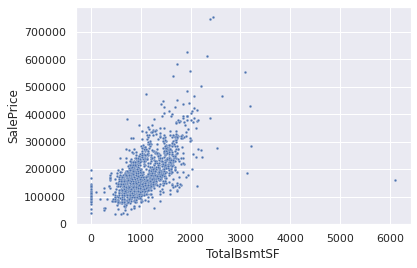

In [441]:
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

In [442]:
df_outliners = df_train.loc[df_train.TotalBsmtSF >= 4500]
df_outliners[['SalePrice', 'TotalBsmtSF']]

,SalePrice,TotalBsmtSF
1298,160000,6110


In [443]:
outliner_replace = df_train.loc[(df_train.SalePrice >= 160_000 - 1000) & (
    df_train.SalePrice <= 160_000 + 1000)].mean().TotalBsmtSF
outliner_replace

1110.6

In [444]:
df_train.TotalBsmtSF.loc[df_train.TotalBsmtSF >= 4500]

1298    6110
Name: TotalBsmtSF, dtype: int64

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

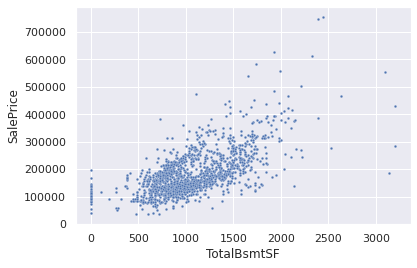

In [445]:
df_train.TotalBsmtSF.loc[df_train.TotalBsmtSF >= 4500] = outliner_replace
sns.scatterplot(data=df_train, y='SalePrice', x='TotalBsmtSF', s=7)

## Looking for correlated features

In [446]:
# Calcul des correlations
correlations = df_train.corr()
attrs = correlations.iloc[:-1, :-1]  # all except target

# Selections des correlations qui nous interessent
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

# Transformation en DataFrame
# Gestion des doubles
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key])
              for key in important_corrs])),
    columns=['Attribute Pair', 'Correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[abs(
    unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
0,"(GarageArea, GarageCars)",0.882475
23,"(GarageYrBlt, YearBuilt)",0.825667
4,"(GrLivArea, TotRmsAbvGrd)",0.824207
20,"(1stFlrSF, TotalBsmtSF)",0.784765
10,"(2ndFlrSF, GrLivArea)",0.692532
11,"(BedroomAbvGr, TotRmsAbvGrd)",0.676620
19,"(BsmtFinSF1, BsmtFullBath)",0.649212
18,"(GarageYrBlt, YearRemodAdd)",0.642277
5,"(FullBath, GrLivArea)",0.636826
12,"(2ndFlrSF, TotRmsAbvGrd)",0.616423


This shows multicollinearity.

In regression, "multicollinearity" refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

Problem:
    
    Multicollinearity increases the standard errors of the coefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant.

To avoid this we can do 3 things:

 - Completely remove those variables
 - Make new feature by adding them or by some other operation.
 - Use PCA, which will reduce feature set to small number of non-collinear features.


Reference:http://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis

In [447]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [448]:
correlations = df_train[f_interest].corr()
attrs = correlations.iloc[1:, 1:]  # all except target

threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key])
              for key in important_corrs])),
    columns=['Attribute Pair', 'Correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.loc[abs(
    unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs

,Attribute Pair,Correlation
0,"(GarageArea, GarageCars)",0.882475
11,"(GarageYrBlt, YearBuilt)",0.825667
2,"(GrLivArea, TotRmsAbvGrd)",0.824207
16,"(1stFlrSF, TotalBsmtSF)",0.784765
13,"(GarageYrBlt, YearRemodAdd)",0.642277
3,"(FullBath, GrLivArea)",0.636826
12,"(GarageCars, OverallQual)",0.600671
6,"(YearBuilt, YearRemodAdd)",0.592855
15,"(GarageCars, GarageYrBlt)",0.588920
5,"(GrLivArea, OverallQual)",0.586306


## Heatmap

Text(0.5, 1.0, 'Correlation between features')

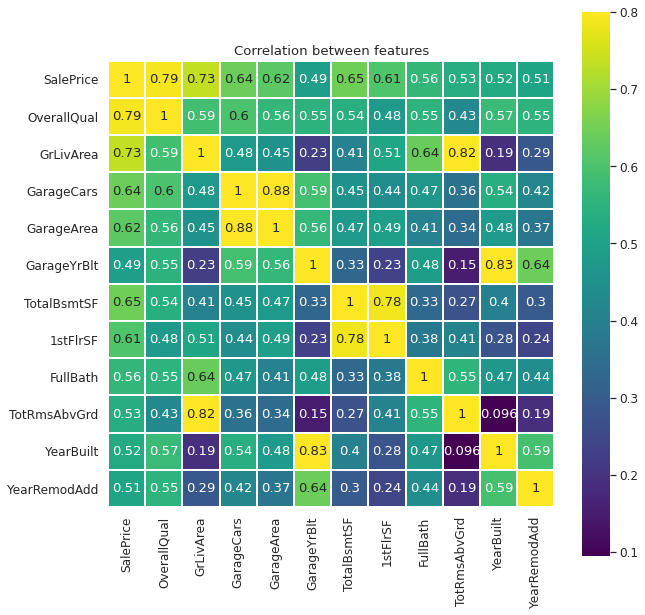

In [449]:
corrMatrix = df_train[f_interest].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix,
            vmax=.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='viridis',
            linecolor="white")
plt.title('Correlation between features')

In [450]:
# ! cat ./houses/data_description.txt | grep -A 10 GrLiv

As we saw above,

there are few feature which shows high multicollinearity from heatmap.


Lets focus on yellow squares on diagonal line and few on the sides.

- SalePrice   and OverallQual
- GarageArea  and GarageCars
- TotalBsmtSF and 1stFlrSF
- GrLiveArea  and TotRmsAbvGrd
- YearBulit   and GarageYrBlt

We have to create a single feature from them before we use them as predictors.

## Pivotal Features

group_by() is really useful for categorical features

In [451]:
subset = df_train[['OverallQual', 'SalePrice']]

group_subset = subset.groupby(['OverallQual'], as_index=False)

group_subset.mean().sort_values(by='OverallQual', ascending=False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


In [452]:
subset = df_train[['GarageCars', 'SalePrice']]

group_subset = subset.groupby(['GarageCars'], as_index=False)

group_subset.mean().sort_values(by='GarageCars', ascending=False)

,GarageCars,SalePrice
4,4,192655.800000
3,3,309636.121547
2,2,183851.663835
1,1,128116.688347
0,0,103317.283951


In [453]:
subset = df_train[['Fireplaces', 'SalePrice']]

group_subset = subset.groupby(['Fireplaces'], as_index=False)

group_subset.mean().sort_values(by='Fireplaces', ascending=False)

,Fireplaces,SalePrice
3,3,252000.000000
2,2,240588.539130
1,1,211843.909231
0,0,141331.482609


## Visualising Target variable

### Univariate Analysis

How 1 single variable is distributed in numeric range. What is statistical summary of it. Is it positively skewed or negatively.

Text(0.5, 0, 'Sale Price')

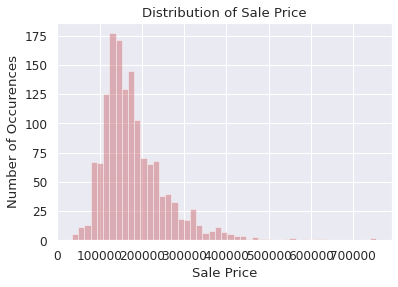

In [454]:
sns.distplot(df_train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

Prices are right skewed and graph shows some peakedness.

### Outliers

In [455]:
# there are some outliers.lets remove them.
upperlimit = np.percentile(df_train.SalePrice.values, 99.5)
upperlimit

527331.9149999974

In [456]:
df_train['SalePrice'].loc[df_train['SalePrice'] > upperlimit]

440     555000
691     755000
769     538000
803     582933
898     611657
1046    556581
1169    625000
1182    745000
Name: SalePrice, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

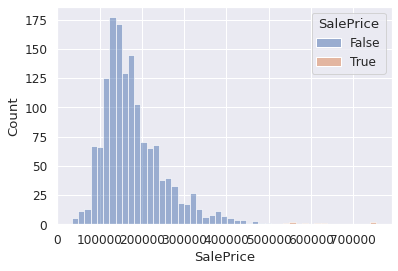

In [457]:
sns.histplot(x=df_train['SalePrice'], hue=(
    df_train['SalePrice'] > upperlimit), kde=False)

In [458]:
if 527331 < upperlimit:
    df_train['SalePrice'].loc[df_train['SalePrice'] > upperlimit] = upperlimit
    print("Changed!")

Changed!


Text(0.5, 0, 'Sale Price')

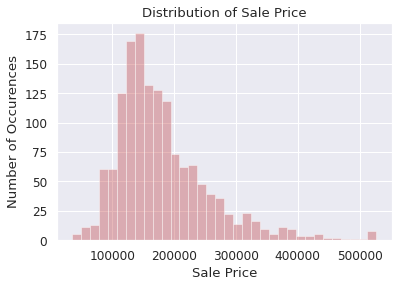

In [459]:
sns.distplot(df_train['SalePrice'], color="r", kde=False)
plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price")

Text(0, 0.5, 'Sale Price')

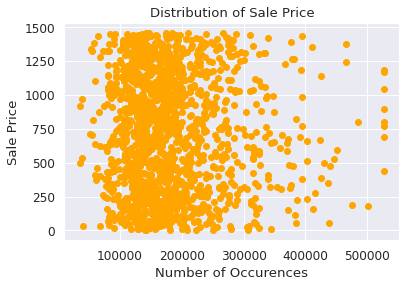

In [460]:
plt.scatter(df_train["SalePrice"].values, range(df_train.shape[0]),color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Occurences")
plt.ylabel("Sale Price")

# Missing Value Imputation

Missing values in the training data set can affect prediction or classification of a model negatively.

Also some machine learning algorithms can't accept missing data eg. SVM.

Filling missing values with:

 - mean
 - median
 - mode 
 - Data Understanding
 - using another predictive model: which handle missing values very well
     - Decision Trees 
     - Random Forest

In [461]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [462]:
# lets see if there are any columns with missing values
def missing(df):
    null_columns = df.columns[df.isnull().any()]
    missing_values = df[null_columns].isnull().sum()
    return missing_values


missing(df_train)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

WE WANT TO TAKE CARE OF BOTH TEST_SET AND TRAIN_SET

In [463]:
def get_miss_no():
    # Train
    null_columns = df_train.columns[df_train.isnull().any()]
    missing_values = df_train[null_columns].isnull().sum()
    # Test
    null_columns = df_test.columns[df_test.isnull().any()]
    missing_test_values = df_test[null_columns].isnull().sum()
    # Concat
    miss_no = pd.concat((missing_values, missing_test_values),
                        axis=1, names=['Train', 'Test'])
    # Rename
    miss_no = miss_no.rename(columns={
        0: 'Train',
        1: 'Test'
    })
    return miss_no


get_miss_no()

,Train,Test
LotFrontage,259.0,227.0
Alley,1369.0,1352.0
MasVnrType,8.0,16.0
MasVnrArea,8.0,15.0
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
BsmtExposure,38.0,44.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
Electrical,1.0,NaN


In [464]:
df_all = pd.concat((df_train, df_test), axis=0)
del df_train
del df_test
df_all

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092.0,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092.0,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224.0,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Ins

In [465]:
df_all.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [466]:
f_interest

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'GarageYrBlt',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [467]:
null_columns = df_all.columns[df_all.isnull().any()]
missing_values = df_all[null_columns].isnull().sum()

f_missing = [
    f_missing for f_missing in missing_values.index if f_missing in f_interest and f_missing != "SalePrice"
]
missing_values[f_missing]

TotalBsmtSF      1
GarageYrBlt    159
GarageCars       1
GarageArea       1
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

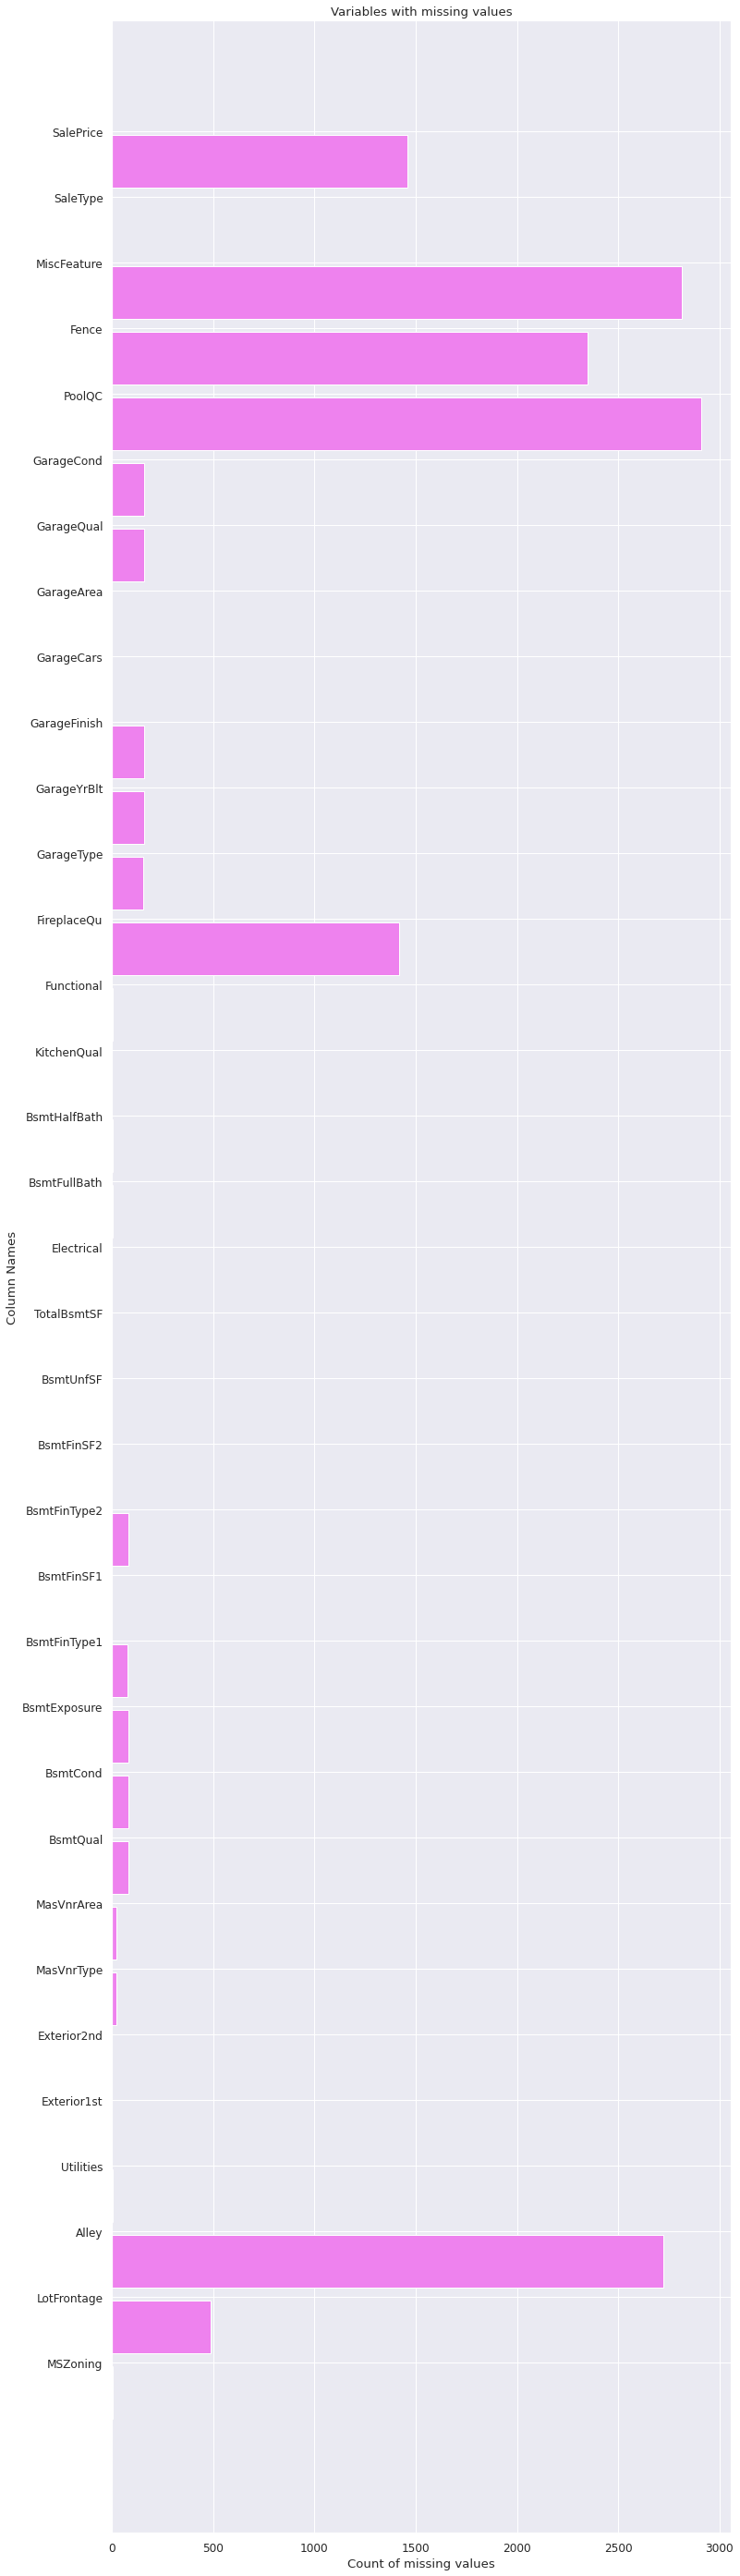

In [468]:
labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df_all[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12, 50))
rects = ax.barh(ind, np.array(values), color='violet')
ax.set_yticks(ind + ((width) / 2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

## Multivariate Analysis

When we understand how 3 or more variables behave according to each other.

### LotFrontage

We can see if there is some correlation between LotArea and LotFrontage

In [469]:
df_all['LotFrontage'].corr(df_all['LotArea'])

0.48989557038716647

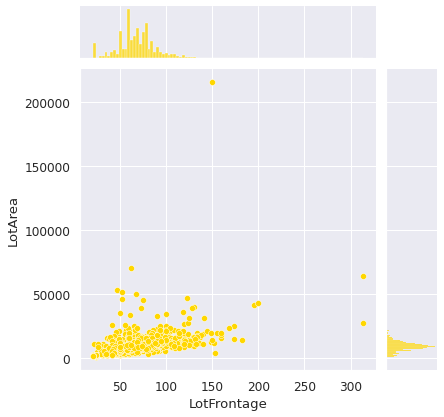

In [470]:
sns.jointplot(df_all['LotFrontage'], df_all['LotArea'], color='gold')

This is not great, we will try some polynomial expressions like squareroot

In [471]:
df_all['SqrtLotArea'] = np.sqrt(df_all['LotArea'])
df_all['LotFrontage'].corr(df_all['SqrtLotArea'])

0.6476580398617827

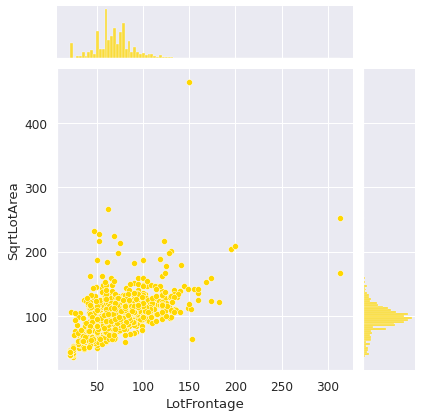

In [472]:
sns.jointplot(df_all['LotFrontage'], df_all['SqrtLotArea'], color='gold')

Solving missing values:

In [473]:
filter = df_all['LotFrontage'].isnull()
df_all.LotFrontage[filter] = df_all.SqrtLotArea[filter]
df_all.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64

## MasVnrType and MasVnrArea

Text(0.5, 0, 'Mas Vnr Area in sq feet')

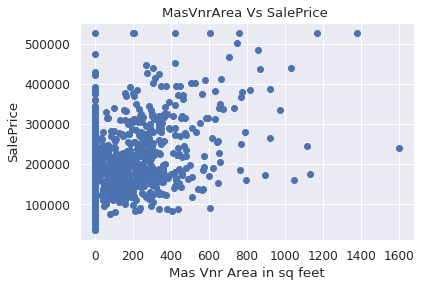

In [474]:
plt.scatter(df_all["MasVnrArea"], df_all["SalePrice"])
plt.title("MasVnrArea Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Mas Vnr Area in sq feet")

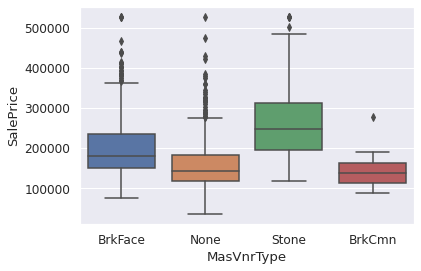

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

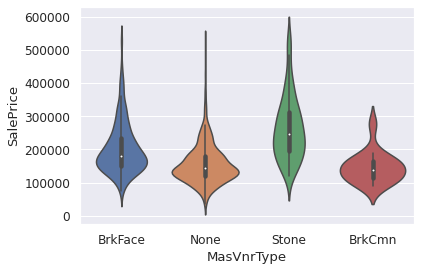

In [475]:
sns.boxplot("MasVnrType", "SalePrice", data=df_all)
plt.show()
sns.violinplot("MasVnrType", "SalePrice", data=df_all)

In [476]:
df_all["MasVnrType"] = df_all["MasVnrType"].fillna('None')
df_all["MasVnrArea"] = df_all["MasVnrArea"].fillna(0.0)

## Bivariate Analysis

When we try to figure out how 2 parameters in dataset are related to each other. in the sense when one decreases, other also decreases or when one increases other also increases i.e Positive Correlation

And when one increases , other decreases or vice versa i .e Negative correlation.

In [477]:
missing(df_all)

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

### Electrical

Text(0.5, 0, 'Electrical')

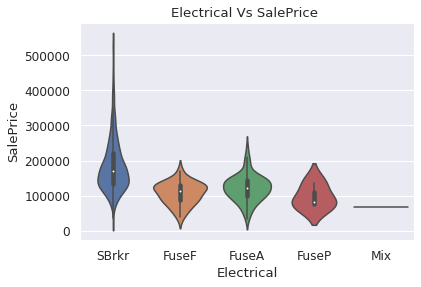

In [478]:
sns.violinplot("Electrical", "SalePrice", data=df_all)
plt.title("Electrical Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Electrical")

In [479]:
# We can replace missing values with most frequent ones.
df_all["Electrical"] = df_all["Electrical"].fillna('SBrkr')

### Alley

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

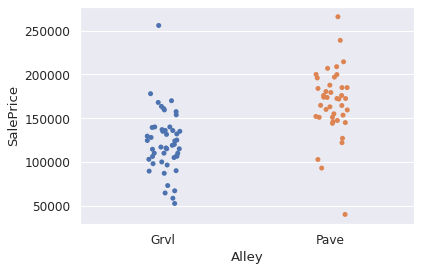

In [480]:
sns.stripplot(x=df_all["Alley"], y=df_all["SalePrice"], jitter=True)

All missing value indicate that particular house doesn't have an alley access.

we can replace it with 'None'.

In [481]:
df_all["Alley"] = df_all["Alley"].fillna('Absent')

### Basement Features

In [482]:
df_train_tmp = df_all.loc[~df_all['SalePrice'].isna()]
del df_train_tmp

Text(0.5, 0, 'Total Basement in sq feet')

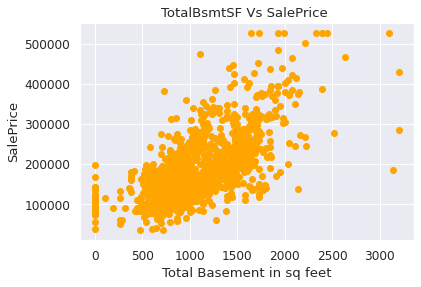

In [483]:
plt.scatter(df_all.TotalBsmtSF, df_all["SalePrice"].values, color='orange')
plt.title("TotalBsmtSF Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Total Basement in sq feet")

In [484]:
basement_cols = [
    'TotalBsmtSF', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
    'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2'
]
misssing_basement = df_all[basement_cols][df_all['BsmtQual'].isnull() == True]
misssing_basement

,TotalBsmtSF,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
39,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
102,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
156,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
1343,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1344,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1364,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1431,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0


All categorical variables contains NAN whereas continuous ones have 0.

So that means there is no basement for those houses. we can replace it with 'None'.

In [485]:
for col in basement_cols:
    if 'SF' not in col:
        df_all[col] = df_all[col].fillna('None')

### Fireplaces

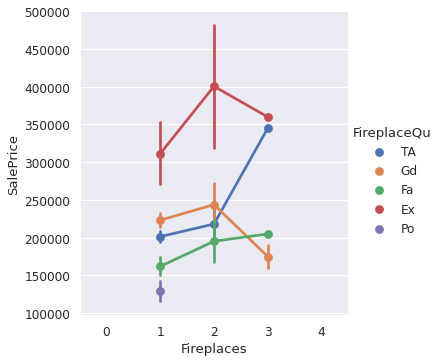

In [486]:
sns.factorplot("Fireplaces", "SalePrice", data=df_all, hue="FireplaceQu")

Having 2 fireplaces increases house price and fireplace of Excellent quality is a big plus

In [487]:
# If fireplace quality is missing that means that house doesn't have a fireplace
df_all["FireplaceQu"] = df_all["FireplaceQu"].fillna('None')
pd.crosstab(df_all.Fireplaces, df_all.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,1420,0,0
1,37,63,627,0,46,495
2,5,10,112,0,0,92
3,1,1,5,0,0,4
4,0,0,0,0,0,1


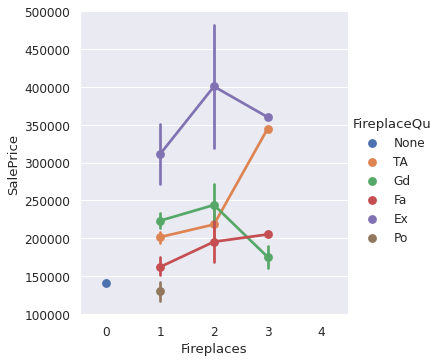

In [488]:
sns.factorplot("Fireplaces", "SalePrice", data=df_all, hue="FireplaceQu")

### Garages

<AxesSubplot:xlabel='GarageArea'>

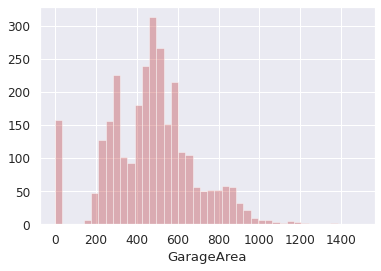

In [489]:
sns.distplot(df_all["GarageArea"], color='r', kde=False)

Text(0.5, 0, 'Garage Area in sq feet')

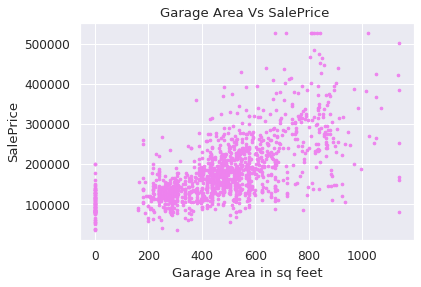

In [562]:
# GarageArea has got some outliers lets remove them.
upperlimit = np.percentile(df_all.GarageArea.values, 99.5)
df_all['GarageArea'].loc[df_all['GarageArea'] > upperlimit] = upperlimit

plt.scatter(df_all.GarageArea, df_all["SalePrice"].values, color='violet', s=7)
plt.title("Garage Area Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Garage Area in sq feet")

Text(0.5, 0, 'Number of Garage cars')

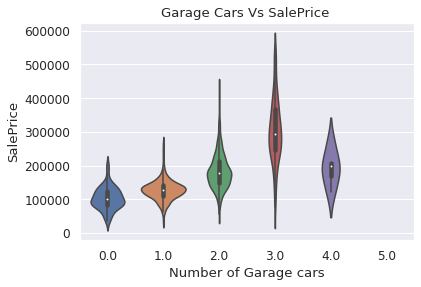

In [491]:
sns.violinplot(df_all["GarageCars"], df_all["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Number of Garage cars")

In [492]:
[i for i in df_all.columns if 'SF' in i]

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [493]:
garage_cols = [
    'GarageType', 'GarageQual', 'GarageCond', 'GarageYrBlt', 'GarageFinish',
    'GarageCars', 'GarageArea'
]
df_all[garage_cols][df_all['GarageType'].isnull() == True]

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0.0,0.0
48,NaN,NaN,NaN,NaN,NaN,0.0,0.0
78,NaN,NaN,NaN,NaN,NaN,0.0,0.0
88,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1433,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1449,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1453,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1454,NaN,NaN,NaN,NaN,NaN,0.0,0.0


All garage related features are missing values in same rows. that means we can replace categorical variables with None and continuous ones with 0.

In [566]:
# df_all['GarageYrBlt'].dtype

In [494]:
for col in garage_cols:
    print(df_all[col].dtype)
    if df_all[col].dtype == np.object:
        df_all[col] = df_all[col].fillna('None')
    else:
        df_all[col] = df_all[col].fillna(0)

object
object
object
float64
object
float64
float64


### Pool

Text(0.5, 10.255999999999986, 'Pool Area in sq feet')

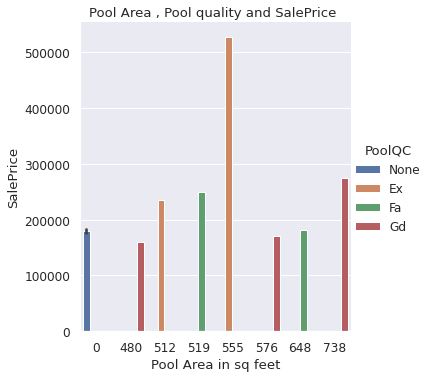

In [495]:
# If PoolArea is 0, that means that house doesn't have a pool.
# So we can replace PoolQuality with None.

df_all["PoolQC"] = df_all["PoolQC"].fillna('None')
sns.factorplot("PoolArea", "SalePrice",
               data=df_all.loc[~df_all['SalePrice'].isna()], hue="PoolQC", kind='bar')
plt.title("Pool Area , Pool quality and SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Pool Area in sq feet")

### Fence

Text(0.5, 0, 'Type of Fence')

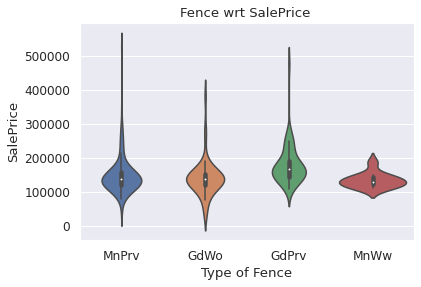

In [496]:
sns.violinplot(df_all["Fence"], df_all["SalePrice"])
plt.title("Fence wrt SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Fence")

Fence has got 1179 null values. We can safely assume that those houses doesn't have a Fence and replace those values with None.

In [497]:
df_all["Fence"] = df_all["Fence"].fillna('None')

### MiscFeature

Text(0.5, 0, 'Type of Miscelleneous Features')

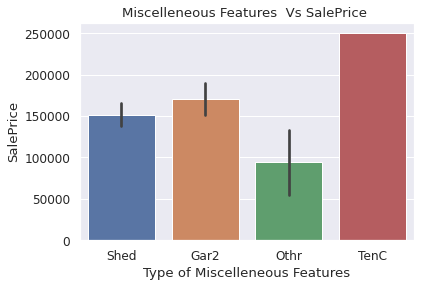

In [498]:
sns.barplot(df_all["MiscFeature"], df_all["SalePrice"])
plt.title("Miscelleneous Features  Vs SalePrice ")
plt.ylabel("SalePrice")
plt.xlabel("Type of Miscelleneous Features")

In [499]:
# Some houses don't have miscellaneous features like shed, Tennis court etc..
df_all["MiscFeature"] = df_all["MiscFeature"].fillna('None')

## Verification

In [500]:
# Let's confirm that we have removed all missing values
missing(df_all)

MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
SaleType           1
SalePrice       1459
dtype: int64

In [573]:
# df_all

In [574]:
# df_all['Exterior1st']

In [575]:
# df_all['Exterior1st'].mode()

In [576]:
# df_all['Exterior1st'].mode()[0]

In [577]:
# df_all['Exterior1st'].fillna(df_all['Exterior1st'].mode()[0])

In [578]:
# my_func = lambda x: x + 1

# my_func(5)

6

In [501]:
df_all['MSZoning'] = df_all.groupby(
    'MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
df_all['Functional'] = df_all['Functional'].fillna('Typ')
df_all['Utilities'] = df_all['Utilities'].fillna('AllPub')
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(
    df_all['Exterior1st'].mode()[0])
df_all['Exterior2nd'] = df_all['Exterior2nd'].fillna(
    df_all['Exterior2nd'].mode()[0])
df_all['Exterior1st'] = df_all['Exterior1st'].fillna(
    df_all['Exterior1st'].mode()[0])
df_all['BsmtFinSF1'] = df_all['BsmtFinSF1'].fillna(
    df_all['BsmtFinSF1'].mode()[0])
df_all['BsmtFinSF2'] = df_all['BsmtFinSF2'].fillna(
    df_all['BsmtFinSF2'].mode()[0])
df_all['BsmtUnfSF'] = df_all['BsmtUnfSF'].fillna(df_all['BsmtUnfSF'].mode()[0])
df_all['BsmtFullBath'] = df_all['BsmtFullBath'].fillna(
    df_all['BsmtFullBath'].mode()[0])
df_all['BsmtHalfBath'] = df_all['BsmtHalfBath'].fillna(
    df_all['BsmtHalfBath'].mode()[0])
df_all['KitchenQual'] = df_all['KitchenQual'].fillna(
    df_all['KitchenQual'].mode()[0])
df_all['TotalBsmtSF'] = df_all['TotalBsmtSF'].fillna(
    df_all['TotalBsmtSF'].mode()[0])
df_all['SaleType'] = df_all['SaleType'].fillna(df_all['SaleType'].mode()[0])

In [502]:
# Let's confirm that we have removed all missing values
missing(df_all)

SalePrice    1459
dtype: int64

In [503]:
df_train = df_all.loc[~df_all['SalePrice'].isna()]
df_test = df_all.loc[df_all['SalePrice'].isna()]

# Visualizations

## MSZoning

In [581]:
!cat houses/data_description.txt | grep -A 10 MSZ

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	


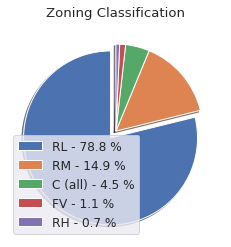

Text(0, 0.5, 'Sale Price')

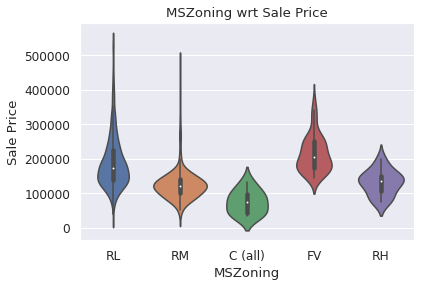

In [505]:
labels = df_train["MSZoning"].unique()
sizes = df_train["MSZoning"].value_counts().values
explode = [0.1, 0, 0, 0, 0]
parcent = 100.*sizes/sizes.sum()
labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(labels, parcent)]

patches, texts = plt.pie(sizes, explode=explode,
                         shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")

plt.title("Zoning Classification")
plt.show()


sns.violinplot(df_train.MSZoning, df_train["SalePrice"])
plt.title("MSZoning wrt Sale Price")
plt.xlabel("MSZoning")
plt.ylabel("Sale Price")

## 1st Floor in square feet

Text(0.5, 0, '1st Floor in square feet')

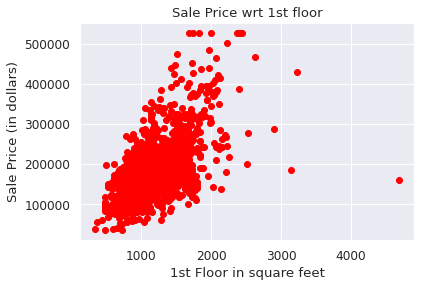

In [506]:
plt.scatter(df_train["1stFlrSF"], df_train.SalePrice, color='red')
plt.title("Sale Price wrt 1st floor")
plt.ylabel('Sale Price (in dollars)')
plt.xlabel("1st Floor in square feet")

## Ground Living Area w.r.t SalePrice

Text(0.5, 0, 'Ground living area')

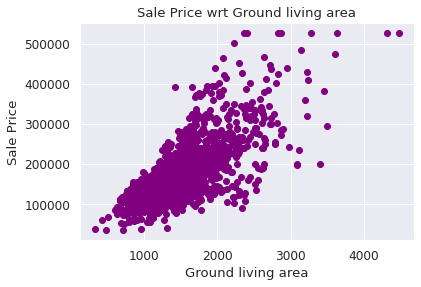

In [507]:
plt.scatter(df_train["GrLivArea"], df_train["SalePrice"], color='purple')
plt.title("Sale Price wrt Ground living area")
plt.ylabel('Sale Price')
plt.xlabel("Ground living area")

## SalePrice per square foot

Text(0.5, 0, 'Price per square feet')

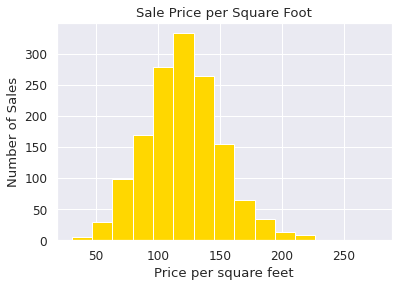

In [508]:
df_train['SalePriceSF'] = df_train['SalePrice']/df_train['GrLivArea']
plt.hist(df_train['SalePriceSF'], bins=15, color="gold")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet')

In [509]:
# Average Sale Price per square feet
print("$", df_train.SalePriceSF.mean())

$ 120.53820237172413


## Garage Area

Text(0.5, 0, 'Garage Area in sq foot')

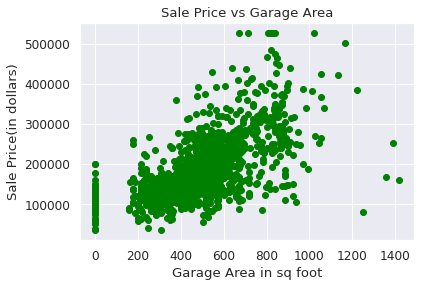

In [510]:
plt.scatter(df_train["GarageArea"], df_train.SalePrice, color='green')
plt.title("Sale Price vs Garage Area")
plt.ylabel('Sale Price(in dollars)')
plt.xlabel("Garage Area in sq foot")

## Building , remodelling years and age of house

<AxesSubplot:xlabel='YearBuilt'>

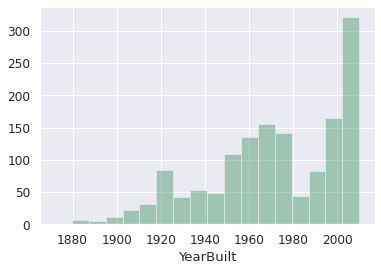

In [511]:
sns.distplot(df_train["YearBuilt"], color='seagreen', kde=False)

<AxesSubplot:xlabel='YearRemodAdd'>

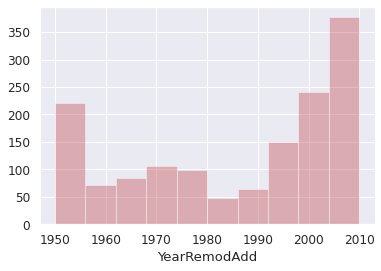

In [512]:
sns.distplot(df_train["YearRemodAdd"].astype(int), color='r', kde=False)

Text(0.5, 0, 'Construction Age of house')

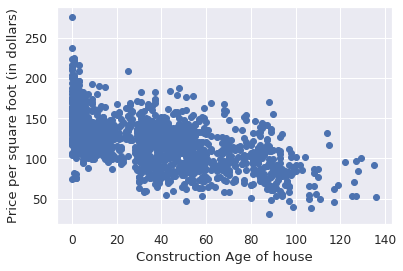

In [513]:
df_train['ConstructionAge'] = df_train['YrSold'] - df_train['YearBuilt']
plt.scatter(df_train['ConstructionAge'], df_train['SalePriceSF'])
plt.ylabel('Price per square foot (in dollars)')
plt.xlabel("Construction Age of house")

Price of house goes down with its age.

## Heating and AC arrangements

In [582]:
!cat houses/*.txt | grep -A 12 HeatingQC

HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		


Text(0.5, 1.0, 'Sale Price vs Heating Quality')

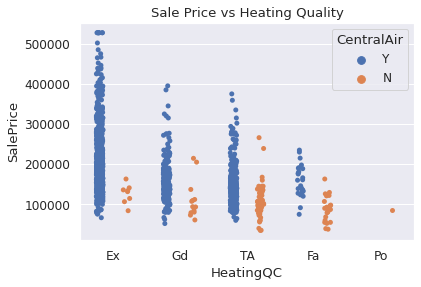

In [515]:
sns.stripplot(x="HeatingQC", y="SalePrice", data=df_train,
              hue='CentralAir', jitter=True, split=True)
plt.title("Sale Price vs Heating Quality")

Having AC definitely escalates price of house.

## Bathrooms in house

Text(0.5, 1.0, 'Sale Price vs Full Bathrooms')

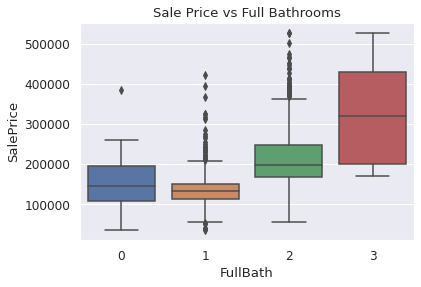

In [516]:
sns.boxplot(df_train["FullBath"], df_train["SalePrice"])
plt.title("Sale Price vs Full Bathrooms")

Text(0.5, 1.0, 'Sale Price vs Half Bathrooms')

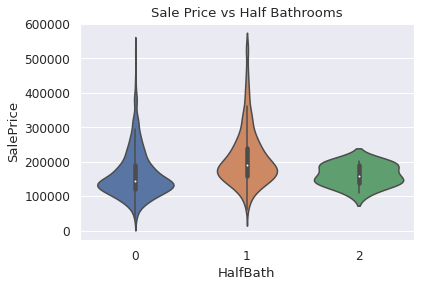

In [517]:
sns.violinplot(df_train["HalfBath"], df_train["SalePrice"])
plt.title("Sale Price vs Half Bathrooms")

## Total rooms above grade

Text(0.5, 1.0, 'Sale Price vs Number of rooms')

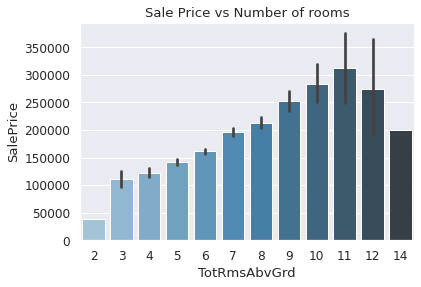

In [518]:
sns.barplot(df_train["TotRmsAbvGrd"], df_train["SalePrice"], palette="Blues_d")
plt.title("Sale Price vs Number of rooms")

## Kitchen Quality

Text(0.5, 1.0, 'Sale Price vs Kitchen')

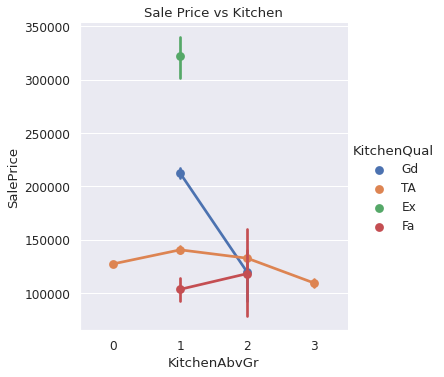

In [519]:
sns.factorplot("KitchenAbvGr", "SalePrice", data=df_train, hue="KitchenQual")
plt.title("Sale Price vs Kitchen")

Having 1 Kitchen of Excellent quality hikes house price like anything.

## Neighbourhood

Text(0.5, 1.0, 'Sale Price vs Neighborhood')

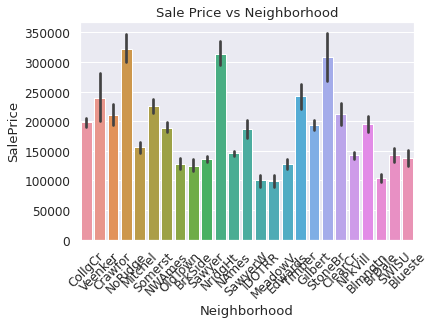

In [520]:
plt.xticks(rotation=45)
sns.barplot(df_train["Neighborhood"], df_train["SalePrice"])
plt.title("Sale Price vs Neighborhood")

## Overall Quality

Text(0.5, 0, 'Sale Price')

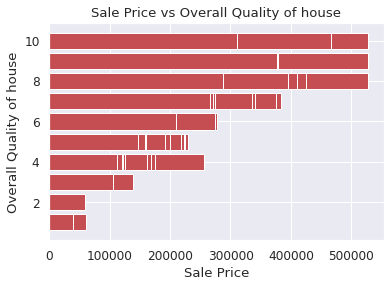

In [521]:
plt.barh(df_train["OverallQual"], width=df_train["SalePrice"], color="r")
plt.title("Sale Price vs Overall Quality of house")
plt.ylabel("Overall Quality of house")
plt.xlabel("Sale Price")

## 2nd Floor with SalePrice

Text(0, 0.5, 'Sale Price')

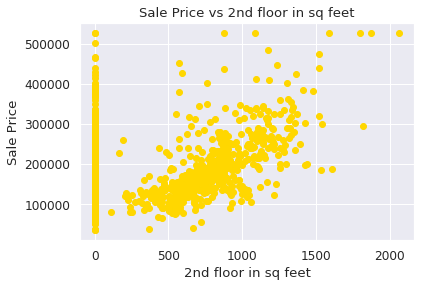

In [522]:
plt.scatter(df_train["2ndFlrSF"], df_train["SalePrice"], color="gold")
plt.title("Sale Price vs 2nd floor in sq feet")
plt.xlabel("2nd floor in sq feet")
plt.ylabel("Sale Price")

## Street

Text(0.5, 1.0, 'Sale Price vs Streets')

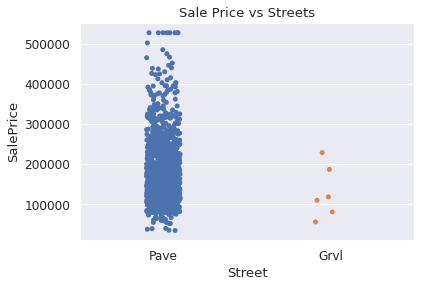

In [523]:
# most streets are paved lets visulalize it
sns.stripplot(x=df_train["Street"], y=df_train["SalePrice"], jitter=True)
plt.title("Sale Price vs Streets")

In [524]:
df_train = df_all.loc[~df_all['SalePrice'].isna()]
df_test = df_all.loc[df_all['SalePrice'].isna()]

# Assumptions of Multi Linear Regression

## List

### Linearity

 - Linearity ( Correct functional form )
     - Since we fit a linear model, we assume that the relationship is linear
     ![linearity](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQu8_Wh57BTtZh4psZNIQgs7Sk5agKFZpSbMw&usqp=CAU)
 

### Homoscedasticity


 - Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
     ![Heteroscedasticity](https://miro.medium.com/max/1400/1*M2187QiB0o0I6r0JfM0JBg.jpeg)
     ![Heteroscedasticity](https://datamotus.com/2019-10-30-Weighted-Least-Squares_files/figure-markdown/HHSKED.png)

### Independence of Errors


 - Independence of Errors ( vs Autocorrelation )
     - we assume, and the errors, or residuals, are pure random fluctuations around the true line
     ![Autocorrelation](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Acf_new.svg/600px-Acf_new.svg.png)

### Multivariate Normality


 - Multivariate Normality ( Normality of Errors )
     ![Multivariate Normality](https://ds055uzetaobb.cloudfront.net/brioche/uploads/4cAXDPaQsy-2varnormal.png?width=2400)

### No Multicollinearity


 - No or little Multicollinearity.
     - a correlation between sequential observations or auto-correlation is not there: a correlation between sequential observations or auto-correlation is not there.
     ![Multicollinearity](https://pbs.twimg.com/media/EDSrIDyXkAcCjZz.png)
     [Multicollinearity](https://i2.wp.com/datascienceplus.com/wp-content/uploads/2017/09/plot_zoom_png.png?ssl=1)


Now, these assumptions are prone to happen altogether.


In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.


## Verifying assumptions


So, How to check regression assumptions?


 - We fit a regression line 
 - and look for the variability of the response data along the regression line


Linearity(Correct functional form): 

    Linear regression needs the relationship between each independent variable and the dependent variable to be linear.
   
The linearity assumption can be tested with scatter plots. 

The following two examples depict two cases, where no or little linearity is present.

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

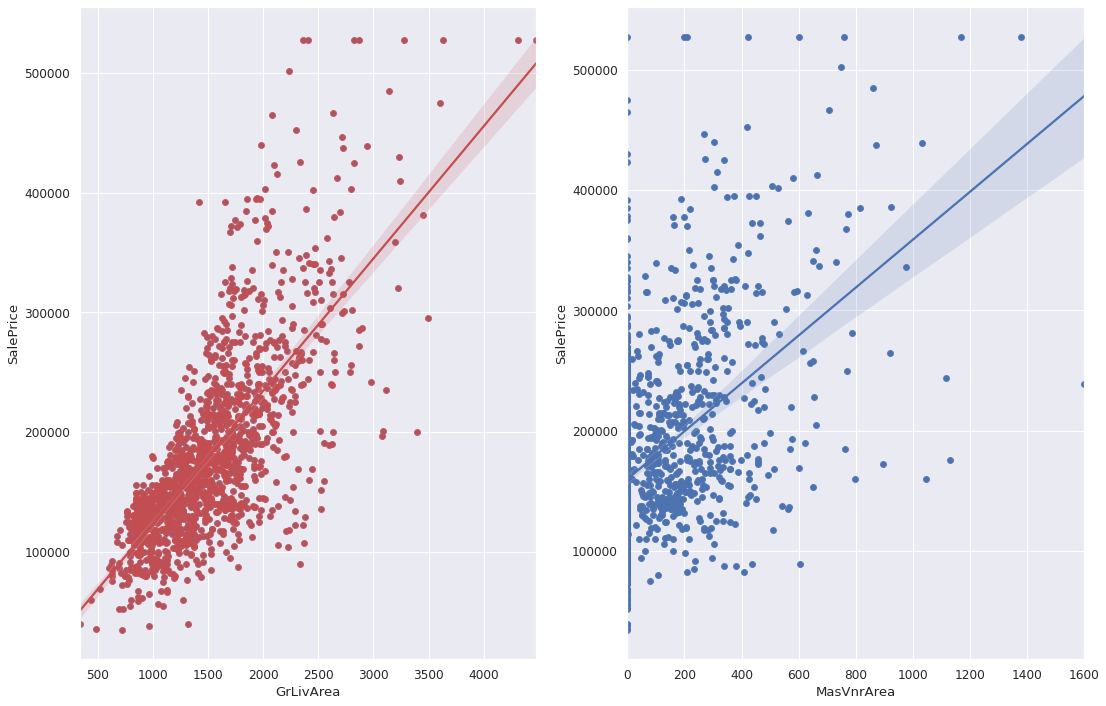

In [525]:
# Plot sizing.
fig, (ax1, ax2) = plt.subplots(figsize=(18, 12), ncols=2, sharey=False)
# Scatter plotting for SalePrice and GrLivArea.
sns.scatterplot(x=df_train.GrLivArea, y=df_train.SalePrice, ax=ax1)
# Putting a regression line.
sns.regplot(x=df_train.GrLivArea, y=df_train.SalePrice, ax=ax1, color='r')

# Scatter plotting for SalePrice and MasVnrArea.
sns.scatterplot(x=df_train.MasVnrArea, y=df_train.SalePrice, ax=ax2)
# regression line for MasVnrArea and SalePrice.
sns.regplot(x=df_train.MasVnrArea, y=df_train.SalePrice, ax=ax2)

Here we are plotting our target variable with two independent variables GrLivArea and MasVnrArea.

There is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea.

One thing to take note here, there are some outliers in the dataset.

It is imperative to check for outliers since linear regression is sensitive to outlier effects. 


Sometimes we may be trying to fit a linear regression model when the data might not be so linear, or the function may need another degree of freedom to fit the data. 

    In that case, we may need to change our function depending on the data to get the best possible fit
    
.
    
    In addition to that, we can also check the residual plot, which tells us how is the error variance across the true line. 
    
 Let's look at the residual plot for independent variable GrLivArea and our target variable SalePrice.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

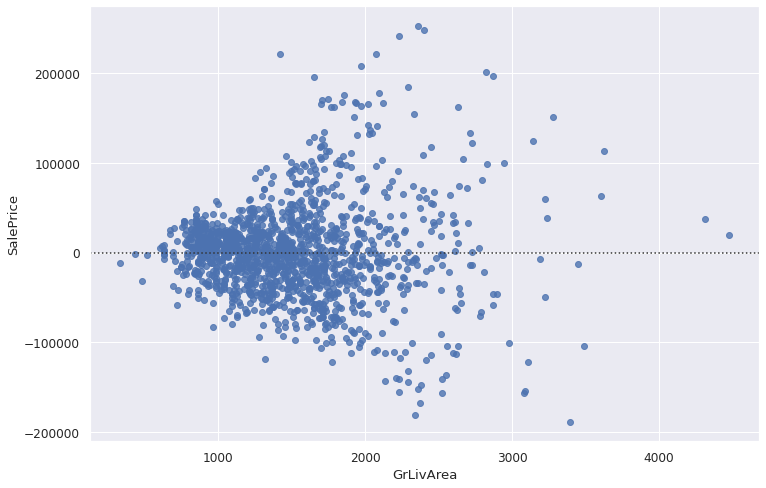

In [526]:
plt.subplots(figsize=(12, 8))
sns.residplot(df_train.GrLivArea, df_train.SalePrice)

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern.

The residual will look like an unstructured cloud of points centered around zero.

However, our residual plot is anything but an unstructured cloud of points. 

The error plot shows that as GrLivArea value increases, the variance also increases, which is the characteristics known as Heteroscedasticity.


Now, these assumptions are prone to happen altogether.


In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

https://statisticsbyjim.com/regression/heteroscedasticity-regression/

 - weighted regression
 - Redefining the variables
 - Logarithm
 - Box-Cox transformation

# Feature Engineering


## Features

### Features Association

In [527]:
# Could also be done with a PCA on the features, and then keeping for each group the first PCA_component
# feture engineering a new feature "TotalFS"
df_all['TotalSF'] = (df_all['TotalBsmtSF']
                     + df_all['1stFlrSF']
                     + df_all['2ndFlrSF'])

df_all['YrBltAndRemod'] = df_all['YearBuilt'] + df_all['YearRemodAdd']

df_all['Total_sqr_footage'] = (df_all['BsmtFinSF1']
                               + df_all['BsmtFinSF2']
                               + df_all['1stFlrSF']
                               + df_all['2ndFlrSF']
                               )


df_all['Total_Bathrooms'] = (df_all['FullBath']
                             + (0.5 * df_all['HalfBath'])
                             + df_all['BsmtFullBath']
                             + (0.5 * df_all['BsmtHalfBath'])
                             )


df_all['Total_porch_sf'] = (df_all['OpenPorchSF']
                            + df_all['3SsnPorch']
                            + df_all['EnclosedPorch']
                            + df_all['ScreenPorch']
                            + df_all['WoodDeckSF']
                            )

### Booleans

In [528]:
df_all['haspool'] = df_all['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['has2ndfloor'] = df_all['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasgarage'] = df_all['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasbsmt'] = df_all['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_all['hasfireplace'] = df_all['Fireplaces'].apply(
    lambda x: 1 if x > 0 else 0)

### Removing Features

In [529]:
df_all = df_all.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

### Creating dummies

In [530]:
f_quantitative = [f for f in df_all.columns if df_all.dtypes[f] != 'object']
f_qualitative = [f for f in df_all.columns if df_all.dtypes[f] == 'object']
f_qualitative

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [531]:
# Creating dummy variable
df_all_dummies = pd.get_dummies(df_all).reset_index(drop=True)
df_all_dummies.shape

(2919, 307)

### Removing overfit features

In [532]:
def overfit_reducer(df, max_overfit=99):
    """
    This function takes in a dataframe and returns a list of features that are overfitted.
    """
    overfit = []
    for feature in df.columns:
        counts = df[feature].value_counts()
        zeros = counts.iloc[0]
        ratio = zeros / len(df)
        if ratio * 100 > max_overfit:
            print(f"{feature:21} = {ratio * 100:3.4}%")
            overfit.append(feature)
    overfit = list(overfit)
    return overfit


overfitted_features = overfit_reducer(df_all_dummies, 98)

LowQualFinSF          = 98.63%
3SsnPorch             = 98.73%
PoolArea              = 99.55%
haspool               = 99.55%
MSZoning_C (all)      = 99.14%
MSZoning_RH           = 99.11%
LotShape_IR3          = 99.45%
LotConfig_FR3         = 99.52%
LandSlope_Sev         = 99.45%
Neighborhood_Blmngtn  = 99.04%
Neighborhood_Blueste  = 99.66%
Neighborhood_BrDale   = 98.97%
Neighborhood_ClearCr  = 98.49%
Neighborhood_MeadowV  = 98.73%
Neighborhood_NPkVill  = 99.21%
Neighborhood_SWISU    = 98.36%
Neighborhood_StoneBr  = 98.25%
Neighborhood_Veenker  = 99.18%
Condition1_PosA       = 99.31%
Condition1_PosN       = 98.66%
Condition1_RRAe       = 99.04%
Condition1_RRAn       = 98.29%
Condition1_RRNe       = 99.79%
Condition1_RRNn       = 99.69%
Condition2_Artery     = 99.83%
Condition2_Feedr      = 99.55%
Condition2_Norm       = 98.97%
Condition2_PosA       = 99.86%
Condition2_PosN       = 99.86%
Condition2_RRAe       = 99.97%
Condition2_RRAn       = 99.97%
Condition2_RRNn       = 99.93%
HouseSty

In [533]:
df_all_reduced = df_all_dummies.drop(overfitted_features, axis=1)

## Target

In [534]:
df_train = df_all_reduced.loc[~df_all_reduced['SalePrice'].isna()]
df_test = df_all_reduced.loc[df_all_reduced['SalePrice'].isna()]

In [535]:
df_train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

### Target Engineering

In [536]:
df_train['log_SP'] = np.log(df_train.SalePrice)
df_train.log_SP

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: log_SP, Length: 1460, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

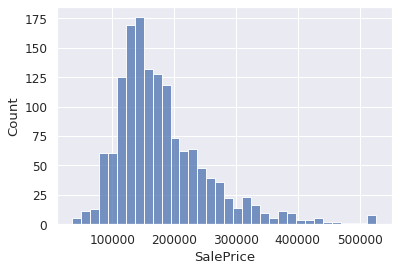

In [537]:
sns.histplot(data=df_train['SalePrice'])

<AxesSubplot:xlabel='log_SP', ylabel='Count'>

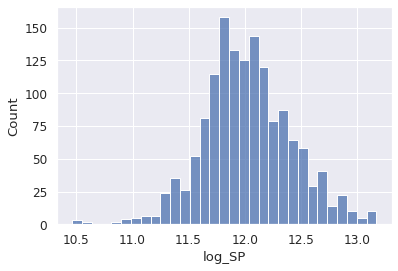

In [538]:
sns.histplot(data=df_train['log_SP'])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

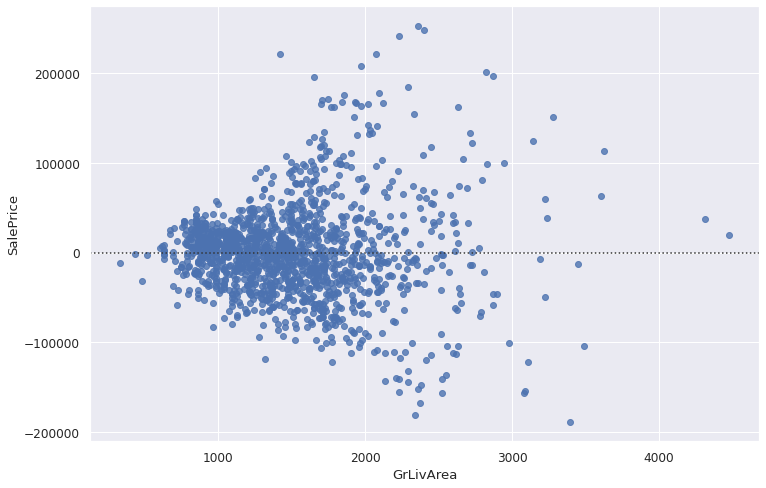

In [539]:
plt.subplots(figsize=(12, 8))
sns.residplot(df_train.GrLivArea, df_train.SalePrice)

<AxesSubplot:xlabel='GrLivArea', ylabel='log_SP'>

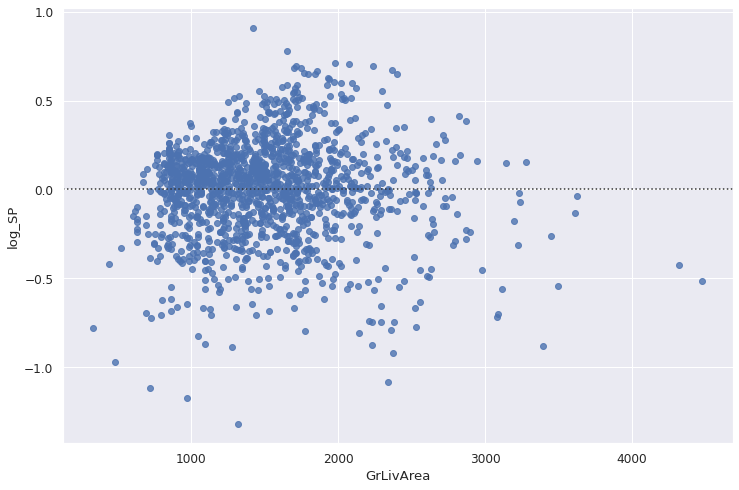

In [540]:
plt.subplots(figsize=(12, 8))
sns.residplot(df_train.GrLivArea, df_train.log_SP)

### Moment

#### Skewness

In [541]:
# skewness
df_train['SalePrice'].skew()

1.4783995516237756

 - is the degree of distortion from the symmetrical bell curve or the normal curve.
 - So, a symmetrical distribution will have a skewness of "0".
 - There are two types of Skewness: Positive and Negative.
     - Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.
         - In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.
     - Negative Skewness means the tail on the left side of the distribution is longer and fatter.
         - In negative Skewness the mean and median will be less than the mode.
 - Skewness differentiates in extreme values in one versus the other tail.

![Skewness](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)

In [542]:
df_train.log_SP.skew()

0.06273158448300642

In [543]:
from scipy.stats import skew

numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

skewed_feats = df_train[numeric_feats].apply(
    lambda x: skew(x)).sort_values(ascending=False)

skewed_feats

MiscVal             24.451640
LotArea             12.195142
ExterCond_Fa         7.011591
PavedDrive_P         6.759264
BldgType_2fmCon      6.642173
                      ...    
GarageYrBlt         -3.865524
hasgarage           -3.883739
LandSlope_Gtl       -3.971698
MiscFeature_None    -4.906673
hasbsmt             -6.040320
Length: 196, dtype: float64

#### Kurtosis

Kurtosis According to Wikipedia,

In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability. distribution of a real-valued random variable. So, In other words, it is the measure of the extreme values(outliers) present in the distribution.

There are three types of Kurtosis: 

    - Mesokurtic,
    - Leptokurtic, and
    - Platykurtic.
    
 - Mesokurtic:
     - is similar to the normal curve with the standard value of 3.
     - This means that the extreme values of this distribution are similar to that of a normal distribution.

 - Leptokurtic:
     - Example of leptokurtic distributions are the T-distributions with small degrees of freedom.

 - Platykurtic: 
     - Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution.
     - Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions.

![Kurtosis](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)

In [544]:
# kurtosis

df_train['SalePrice'].kurt()

3.0700708313821212

In [545]:
# Adjusted kurtosis

df_train['SalePrice'].kurt() - 3

0.07007083138212122

# Fitting Model

In [546]:
X = df_train.drop(['SalePrice', 'log_SP'], axis=1)
y = df_train['log_SP']

## Simple fit: LinearRegression

In [547]:
# Train test s
from sklearn.model_selection import train_test_split
# Train test split follows this distinguished code pattern and helps creating train and test set to build machine learning.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.33, random_state=42)

In [548]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((978, 194), (978,), (482, 194), (482,))

In [549]:
# importing necessary models.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)
# fit train and test data.
lin_reg.fit(X_train, y_train)
# Predict test data.
y_pred = lin_reg.predict(X_test)

In [550]:
# get average squared error(MSE) by comparing predicted values with real values.
print(mean_squared_error(y_test, y_pred))

5.634627229660019e+17


### Cross Validation

In [551]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
lin_reg = LinearRegression()
cv = KFold(shuffle=True, random_state=42, n_splits=10)
scores = cross_val_score(lin_reg, X, y, cv=cv,
                         scoring='neg_mean_absolute_error')

In [552]:
scores.mean()

-0.08326547136875155

### Regularization Models

What makes regression model more effective is its ability of *regularizing*. 

The term "regularizing" stands for models ability **to structurally prevent overfitting by imposing a penalty on the coefficients.** 


There are three types of regularizations. 
* **Ridge**
* **Lasso**
* **Elastic Net**

## Advanced

### Meta Params

In [306]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)


def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                   scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [307]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003,
           0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

### Models creation

In [314]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV

ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))

In [315]:
from sklearn.linear_model import LassoCV

lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7,
                                              alphas=alphas2,
                                              random_state=42,
                                              cv=kfolds))

In [316]:
from sklearn.linear_model import ElasticNetCV

elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(
    max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))

In [317]:
from sklearn.svm import SVR

svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003,))

In [318]:
gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)

In [320]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=4,
                         learning_rate=0.01,
                         n_estimators=5000,
                         max_bin=200,
                         bagging_fraction=0.75,
                         bagging_freq=5,
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1,
                         )

In [324]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006)

In [325]:
from mlxtend.regressor import StackingCVRegressor

stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

### Models fit

In [327]:
from datetime import datetime

score = cv_rmse(ridge)
print("Ridge: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("LASSO: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("elastic net: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("lightgbm: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

# score = cv_rmse(gbr)
# print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("xgboost: {:.4f} ({:.4f})\n".format(
    score.mean(), score.std()), datetime.now(), )

Ridge: 0.1191 (0.0159)
 2021-05-20 05:39:32.685106
LASSO: 0.1169 (0.0148)
 2021-05-20 05:39:44.999725
elastic net: 0.1169 (0.0148)
 2021-05-20 05:40:35.731068
SVR: 0.1697 (0.0227)
 2021-05-20 05:40:38.001198
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Cu

In [328]:
print('START Fit')

print('stack_gen')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))

print('elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)

print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

print('Svr')
svr_model_full_data = svr.fit(X, y)

# print('GradientBoosting')
# gbr_model_full_data = gbr.fit(X, y)

print('xgboost')
xgb_model_full_data = xgboost.fit(X, y)

print('lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)

START Fit
stack_gen
[05:44:23] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:32] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:36] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:40] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fract

### Predict

In [329]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) +
            (0.05 * lasso_model_full_data.predict(X)) +
            (0.2 * ridge_model_full_data.predict(X)) +
            (0.1 * svr_model_full_data.predict(X)) + \
            #             (0.1 * gbr_model_full_data.predict(X)) + \
            (0.15 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.3 * stack_gen_model.predict(np.array(X))))

In [330]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.06730924629828079


In [341]:
def unlog_predict(X):
    return np.floor(np.expm1(blend_models_predict(X)))

### Scores

In [343]:
error = mean_squared_error(y_test, blend_models_predict(X_test))
error

0.004974818859428245

In [338]:
X_test.shape

(482, 194)

In [344]:
error / X_test.shape[1]

2.564339618261982e-05